Import Packages

In [13]:
import skgstat as skg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from pprint import pprint
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

Import Data
Source:
Morlighem, M., et al. “BedMachine v3: Complete Bed Topography and Ocean Bathymetry Mapping of Greenland From Multibeam Echo Sounding Combined With Mass Conservation.” Geophysical Research Letters, vol. 44, no. 21, American Geophysical Union (AGU), Nov. 2017, pp. 11,051–11,061, doi:10.1002/2017gl074954.

View Data

Dimensions: 488106x3
          X          Y     Bed
0 -220370.0 -1650000.0  238.31
1 -220370.0 -1650200.0  237.84
2 -220370.0 -1650300.0  234.70
3 -220370.0 -1650400.0  224.55
4 -220370.0 -1650600.0  212.69

X range:              [-300000.0, -150000.0]
Y range:              [-1800000.0, -1650000.0]
Bed elevation range:  [-717.78, 999.9527]



<function matplotlib.pyplot.show(close=None, block=None)>

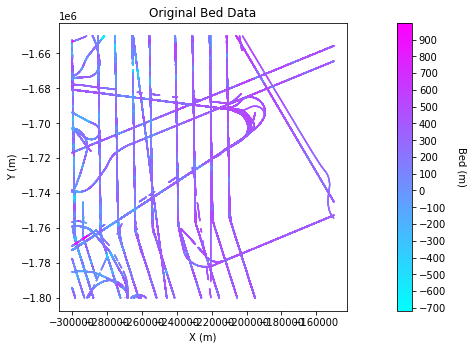

In [14]:
bed_data = pd.read_csv('greenland_test_data.csv')
data_points_count, column_count = bed_data.shape

print(f"Dimensions: {data_points_count}x{column_count}")
print(bed_data.head())
print()


x_min, y_min, bed_elevation_min = bed_data.min()
x_max, y_max, bed_elevation_max = bed_data.max()

print(f"X range:              [{x_min}, {x_max}]")
print(f"Y range:              [{y_min}, {y_max}]")
print(f"Bed elevation range:  [{bed_elevation_min}, {bed_elevation_max}]")
print()

im = plt.scatter(bed_data['X'],bed_data['Y'],
                 c = bed_data['Bed'],
                 vmin = bed_elevation_min, vmax = bed_elevation_max,
                 marker=".", s = 0.5, cmap = 'cool')
plt.title('Original Bed Data')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-800, 1000, 19))
cbar.set_label("Bed (m)", rotation=270, labelpad=20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
plt.axis('scaled')
plt.show

Calculate Variogram and Elevation Mean Functions

In [15]:
def calculate_variogram(data, square_length, x, y, sample):
    """
    :param sample: Number of datapoints to include in the variogram
    :param data: nx3 array consisting of X coordinates, Y coordinates, and bed elevation
    :param square_length: Length of the square in which variance is being calculated
    :param x: Top left x coordinate of the square
    :param y: Top left y coordinate of the square
    :return: Variograms and average elevation
    """

    # x <= X < x + square_length
    filtered_data = data[(data['X'] >= x) & (data['X'] < x + square_length)]

    # y - square_length < Y <= y
    filtered_data = filtered_data[(filtered_data['Y'] <= y) & (filtered_data['Y'] > y - square_length)]

    #Shrink Data
    if len(filtered_data) > sample:
        filtered_data = filtered_data.sample(n = sample)

    # Convert data to coordinates and elevations
    elevations = np.array(filtered_data['Bed'])
    elevation_mean = np.mean(elevations)
    coordinates = filtered_data.to_numpy()
    coordinates = coordinates[:,:2]

    # Calculate variogram
    if len(filtered_data) < 30:
        return None, None
    else:

        #Non-Directional Variogram
        try:
            variogram = skg.Variogram(coordinates, elevations)
        except:
            variogram = None

        #Azimuth 0
        try:
            variogram_0 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 0,
                                                   directional_model = 'compass')
        except:
            variogram_0 = None

        #Azimuth 10
        try:
            variogram_10 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 10,
                                               directional_model = 'compass')
        except:
            variogram_10 = None

        #Azimuth 20
        try:
            variogram_20 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 20,
                                               directional_model = 'compass')
        except:
            variogram_20 = None

        #Azimuth 30
        try:
            variogram_30 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 30,
                                               directional_model = 'compass')
        except:
            variogram_30 = None

        #Azimuth 40
        try:
            variogram_40 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                               directional_model = 'compass')
        except:
            variogram_40 = None

        #Azimuth 50
        try:
            variogram_50 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_50 = None

        #Azimuth 60
        try:
            variogram_60 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_60 = None

        #Azimuth 70
        try:
            variogram_70 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_70 = None

        #Azimuth 80
        try:
            variogram_80 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_80 = None

        #Azimuth 90
        try:
            variogram_90 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_90 = None

        #Azimuth 100
        try:
            variogram_100 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_100 = None

        #Azimuth 110
        try:
            variogram_110 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_110 = None

        #Azimuth 120
        try:
            variogram_120 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_120 = None

        #Azimuth 130
        try:
            variogram_130 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_130 = None

        #Azimuth 140
        try:
            variogram_140 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_140 = None

        #Azimuth 150
        try:
            variogram_150 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_150 = None

        #Azimuth 160
        try:
            variogram_160 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_160 = None

        #Azimuth 170
        try:
            variogram_170 = skg.DirectionalVariogram(coordinates, elevations, azimuth = 40,
                                                    directional_model = 'compass')
        except:
            variogram_170 = None

        variograms = [variogram, variogram_0, variogram_10, variogram_20, variogram_30, variogram_40,
                      variogram_50, variogram_60, variogram_70, variogram_80, variogram_90, variogram_100,
                      variogram_110, variogram_120, variogram_130, variogram_140, variogram_150,
                      variogram_160, variogram_170]

        return variograms, elevation_mean

Iterate Square Over Entire Data Function (Variogram)

In [16]:
def iterate_variogram(data, square_length, stride, sample = 300):
    """
    :param sample: Number of datapoints to sample per square
    :param data: nx3 array consisting of X coordinates, Y coordinates, and bed elevation
    :param square_length: Length of the squares in which variance is being calculated
    :param stride: Distance the square shifts after each iteration
    :return: pandas data frame consisting of the range, sill, and mean elevation in each square, along with the X and Y coordinates of the square's center
    """

    #Function to add individual variogram data to numpy array
    def add_to_array(current_variogram, elevation_mean, current_x, current_y, row):
        """
        :param current_variogram: List of variograms
        :param elevation_mean: Average elevation in the square
        :param current_x: X coordinate
        :param current_y: Y coordinate
        :param row: Current row in array
        """

        # Gather range and sill
        if current_variogram is not None:

            #Non-Directional Variogram
            if current_variogram[0] is not None:
                square_sill = current_variogram[0].describe()["sill"]
                square_range = current_variogram[0].describe()["effective_range"]
                lag_distance = square_range / 100
                square_var = current_variogram[0].data()[1]
                square_integral = np.sum(square_var) * lag_distance
            else:
                square_sill = np.nan
                square_range = np.nan
                square_integral = np.nan

            #Azimuth 0
            if current_variogram[1] is not None:
                azimuth0_sill = current_variogram[1].describe()["sill"]
                azimuth0_range = current_variogram[1].describe()["effective_range"]
                lag_distance = azimuth0_range / 100
                square_var = current_variogram[1].data()[1]
                integral_0 = np.sum(square_var) * lag_distance
            else:
                azimuth0_sill = np.nan
                azimuth0_range = np.nan
                integral_0 = np.nan

            #Azimuth 10
            if current_variogram[2] is not None:
                azimuth10_sill = current_variogram[2].describe()["sill"]
                azimuth10_range = current_variogram[2].describe()["effective_range"]
                lag_distance = azimuth10_range / 100
                square_var = current_variogram[2].data()[1]
                integral_10 = np.sum(square_var) * lag_distance
            else:
                azimuth10_sill = np.nan
                azimuth10_range = np.nan
                integral_10 = np.nan

            #Azimuth 20
            if current_variogram[3] is not None:
                azimuth20_sill = current_variogram[3].describe()["sill"]
                azimuth20_range = current_variogram[3].describe()["effective_range"]
                lag_distance = azimuth20_range / 100
                square_var = current_variogram[3].data()[1]
                integral_20 = np.sum(square_var) * lag_distance
            else:
                azimuth20_sill = np.nan
                azimuth20_range = np.nan
                integral_20 = np.nan

            #Azimuth 30
            if current_variogram[4] is not None:
                azimuth30_sill = current_variogram[4].describe()["sill"]
                azimuth30_range = current_variogram[4].describe()["effective_range"]
                lag_distance = azimuth30_range / 100
                square_var = current_variogram[4].data()[1]
                integral_30 = np.sum(square_var) * lag_distance
            else:
                azimuth30_sill = np.nan
                azimuth30_range = np.nan
                integral_30 = np.nan

            #Azimuth 40
            if current_variogram[5] is not None:
                azimuth40_sill = current_variogram[5].describe()["sill"]
                azimuth40_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth40_range / 100
                square_var = current_variogram[5].data()[1]
                integral_40 = np.sum(square_var) * lag_distance
            else:
                azimuth40_sill = np.nan
                azimuth40_range = np.nan
                integral_40 = np.nan

            #Azimuth 50
            if current_variogram[5] is not None:
                azimuth50_sill = current_variogram[5].describe()["sill"]
                azimuth50_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth50_range / 100
                square_var = current_variogram[5].data()[1]
                integral_50 = np.sum(square_var) * lag_distance
            else:
                azimuth50_sill = np.nan
                azimuth50_range = np.nan
                integral_50 = np.nan

            #Azimuth 60
            if current_variogram[5] is not None:
                azimuth60_sill = current_variogram[5].describe()["sill"]
                azimuth60_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth60_range / 100
                square_var = current_variogram[5].data()[1]
                integral_60 = np.sum(square_var) * lag_distance
            else:
                azimuth60_sill = np.nan
                azimuth60_range = np.nan
                integral_60 = np.nan

            #Azimuth 70
            if current_variogram[5] is not None:
                azimuth70_sill = current_variogram[5].describe()["sill"]
                azimuth70_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth70_range / 100
                square_var = current_variogram[5].data()[1]
                integral_70 = np.sum(square_var) * lag_distance
            else:
                azimuth70_sill = np.nan
                azimuth70_range = np.nan
                integral_70 = np.nan

            #Azimuth 80
            if current_variogram[5] is not None:
                azimuth80_sill = current_variogram[5].describe()["sill"]
                azimuth80_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth80_range / 100
                square_var = current_variogram[5].data()[1]
                integral_80 = np.sum(square_var) * lag_distance
            else:
                azimuth80_sill = np.nan
                azimuth80_range = np.nan
                integral_80 = np.nan

            #Azimuth 90
            if current_variogram[5] is not None:
                azimuth90_sill = current_variogram[5].describe()["sill"]
                azimuth90_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth90_range / 100
                square_var = current_variogram[5].data()[1]
                integral_90 = np.sum(square_var) * lag_distance
            else:
                azimuth90_sill = np.nan
                azimuth90_range = np.nan
                integral_90 = np.nan

            #Azimuth 100
            if current_variogram[5] is not None:
                azimuth100_sill = current_variogram[5].describe()["sill"]
                azimuth100_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth100_range / 100
                square_var = current_variogram[5].data()[1]
                integral_100 = np.sum(square_var) * lag_distance
            else:
                azimuth100_sill = np.nan
                azimuth100_range = np.nan
                integral_100 = np.nan

            #Azimuth 110
            if current_variogram[5] is not None:
                azimuth110_sill = current_variogram[5].describe()["sill"]
                azimuth110_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth110_range / 100
                square_var = current_variogram[5].data()[1]
                integral_110 = np.sum(square_var) * lag_distance
            else:
                azimuth110_sill = np.nan
                azimuth110_range = np.nan
                integral_110 = np.nan

            #Azimuth 120
            if current_variogram[5] is not None:
                azimuth120_sill = current_variogram[5].describe()["sill"]
                azimuth120_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth120_range / 100
                square_var = current_variogram[5].data()[1]
                integral_120 = np.sum(square_var) * lag_distance
            else:
                azimuth120_sill = np.nan
                azimuth120_range = np.nan
                integral_120 = np.nan

            #Azimuth 130
            if current_variogram[5] is not None:
                azimuth130_sill = current_variogram[5].describe()["sill"]
                azimuth130_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth130_range / 100
                square_var = current_variogram[5].data()[1]
                integral_130 = np.sum(square_var) * lag_distance
            else:
                azimuth130_sill = np.nan
                azimuth130_range = np.nan
                integral_130 = np.nan

            #Azimuth 140
            if current_variogram[5] is not None:
                azimuth140_sill = current_variogram[5].describe()["sill"]
                azimuth140_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth140_range / 100
                square_var = current_variogram[5].data()[1]
                integral_140 = np.sum(square_var) * lag_distance
            else:
                azimuth140_sill = np.nan
                azimuth140_range = np.nan
                integral_140 = np.nan

            #Azimuth 150
            if current_variogram[5] is not None:
                azimuth150_sill = current_variogram[5].describe()["sill"]
                azimuth150_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth150_range / 100
                square_var = current_variogram[5].data()[1]
                integral_150 = np.sum(square_var) * lag_distance
            else:
                azimuth150_sill = np.nan
                azimuth150_range = np.nan
                integral_150 = np.nan

            #Azimuth 160
            if current_variogram[5] is not None:
                azimuth160_sill = current_variogram[5].describe()["sill"]
                azimuth160_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth160_range / 100
                square_var = current_variogram[5].data()[1]
                integral_160 = np.sum(square_var) * lag_distance
            else:
                azimuth160_sill = np.nan
                azimuth160_range = np.nan
                integral_160 = np.nan

            #Azimuth 170
            if current_variogram[5] is not None:
                azimuth170_sill = current_variogram[5].describe()["sill"]
                azimuth170_range = current_variogram[5].describe()["effective_range"]
                lag_distance = azimuth170_range / 100
                square_var = current_variogram[5].data()[1]
                integral_170 = np.sum(square_var) * lag_distance
            else:
                azimuth170_sill = np.nan
                azimuth170_range = np.nan
                integral_170 = np.nan

        else:
            square_sill = np.nan
            square_range = np.nan
            azimuth0_sill = np.nan
            azimuth10_sill = np.nan
            azimuth20_sill = np.nan
            azimuth30_sill = np.nan
            azimuth40_sill = np.nan
            azimuth50_sill = np.nan
            azimuth60_sill = np.nan
            azimuth70_sill = np.nan
            azimuth80_sill = np.nan
            azimuth90_sill = np.nan
            azimuth100_sill = np.nan
            azimuth110_sill = np.nan
            azimuth120_sill = np.nan
            azimuth130_sill = np.nan
            azimuth140_sill = np.nan
            azimuth150_sill = np.nan
            azimuth160_sill = np.nan
            azimuth170_sill = np.nan
            azimuth0_range = np.nan
            azimuth10_range = np.nan
            azimuth20_range = np.nan
            azimuth30_range = np.nan
            azimuth40_range = np.nan
            azimuth50_range = np.nan
            azimuth60_range = np.nan
            azimuth70_range = np.nan
            azimuth80_range = np.nan
            azimuth90_range = np.nan
            azimuth100_range = np.nan
            azimuth110_range = np.nan
            azimuth120_range = np.nan
            azimuth130_range = np.nan
            azimuth140_range = np.nan
            azimuth150_range = np.nan
            azimuth160_range = np.nan
            azimuth170_range = np.nan
            square_integral = np.nan
            integral_0 = np.nan
            integral_10 = np.nan
            integral_20 = np.nan
            integral_30 = np.nan
            integral_40 = np.nan
            integral_50 = np.nan
            integral_60 = np.nan
            integral_70 = np.nan
            integral_80 = np.nan
            integral_90 = np.nan
            integral_100 = np.nan
            integral_110 = np.nan
            integral_120 = np.nan
            integral_130 = np.nan
            integral_140 = np.nan
            integral_150 = np.nan
            integral_160 = np.nan
            integral_170 = np.nan

        # Add data to numpy array
        variogram_array[row, 0] = current_x + square_length / 2.0
        variogram_array[row, 1] = current_y - square_length / 2.0
        variogram_array[row, 2] = square_sill
        variogram_array[row, 3] = square_range
        variogram_array[row, 4] = square_integral
        variogram_array[row, 5] = elevation_mean
        variogram_array[row, 6] = azimuth0_sill
        variogram_array[row, 7] = azimuth0_range
        variogram_array[row, 8] = integral_0
        variogram_array[row, 9] = azimuth10_sill
        variogram_array[row, 10] = azimuth10_range
        variogram_array[row, 11] = integral_10
        variogram_array[row, 12] = azimuth20_sill
        variogram_array[row, 13] = azimuth20_range
        variogram_array[row, 14] = integral_20
        variogram_array[row, 15] = azimuth30_sill
        variogram_array[row, 16] = azimuth30_range
        variogram_array[row, 17] = integral_30
        variogram_array[row, 18] = azimuth40_sill
        variogram_array[row, 19] = azimuth40_range
        variogram_array[row, 20] = integral_40
        variogram_array[row, 21] = azimuth50_sill
        variogram_array[row, 22] = azimuth50_range
        variogram_array[row, 23] = integral_50
        variogram_array[row, 24] = azimuth60_sill
        variogram_array[row, 25] = azimuth60_range
        variogram_array[row, 26] = integral_60
        variogram_array[row, 27] = azimuth70_sill
        variogram_array[row, 28] = azimuth70_range
        variogram_array[row, 29] = integral_70
        variogram_array[row, 30] = azimuth80_sill
        variogram_array[row, 31] = azimuth80_range
        variogram_array[row, 32] = integral_80
        variogram_array[row, 33] = azimuth90_sill
        variogram_array[row, 34] = azimuth90_range
        variogram_array[row, 35] = integral_90
        variogram_array[row, 36] = azimuth100_sill
        variogram_array[row, 37] = azimuth100_range
        variogram_array[row, 38] = integral_100
        variogram_array[row, 39] = azimuth110_sill
        variogram_array[row, 40] = azimuth110_range
        variogram_array[row, 41] = integral_110
        variogram_array[row, 42] = azimuth120_sill
        variogram_array[row, 43] = azimuth120_range
        variogram_array[row, 44] = integral_120
        variogram_array[row, 45] = azimuth130_sill
        variogram_array[row, 46] = azimuth130_range
        variogram_array[row, 47] = integral_130
        variogram_array[row, 48] = azimuth140_sill
        variogram_array[row, 49] = azimuth140_range
        variogram_array[row, 50] = integral_140
        variogram_array[row, 51] = azimuth150_sill
        variogram_array[row, 52] = azimuth150_range
        variogram_array[row, 53] = integral_150
        variogram_array[row, 54] = azimuth160_sill
        variogram_array[row, 55] = azimuth160_range
        variogram_array[row, 56] = integral_160
        variogram_array[row, 57] = azimuth170_sill
        variogram_array[row, 58] = azimuth170_range
        variogram_array[row, 59] = integral_170
        variogram_array[row, 60] = np.nan

    ##################################### Main Function #####################################

    #Calculate the range of the data
    x_minimum, y_minimum, _ = data.min()
    x_maximum, y_maximum, _ = data.max()

    #Initialize x and y
    x, y = x_minimum, y_maximum

    #Count squares
    total_x_squares = math.ceil((x_maximum - x_minimum - square_length) / stride) + 1
    total_y_squares = math.ceil((y_maximum - y_minimum - square_length) / stride) + 1
    total_squares = int(total_y_squares * total_x_squares)

    #Create numpy array to store data from each variogram
    variogram_array = np.zeros((total_squares, 61))

    #Iterate over all data
    i = 0
    while y - square_length >= y_minimum:
        while x + square_length <= x_maximum:

            #Calculate variogram
            square_variogram, avg_elevation = calculate_variogram(data, square_length, x, y, sample)

            #Add data to numpy array
            add_to_array(square_variogram, avg_elevation, x, y, i)
            i += 1

            #Go to next square
            x += stride

        #Include right edge squares
        if ((x_maximum - x_minimum - square_length) % stride) != 0:
            x = x_maximum - square_length

            #Calculate variogram
            square_variogram, avg_elevation = calculate_variogram(data, square_length, x, y, sample)

            #Add data to numpy array
            add_to_array(square_variogram, avg_elevation, x, y, i)
            i += 1

        #Reset x and lower y value to iterate vertically
        x = x_minimum
        y -= stride

    #Include bottom edge squares
    if (y_maximum - y_minimum - square_length) % stride != 0:
        y = y_minimum + square_length
        while x + square_length <= x_maximum:

            #Calculate variogram
            square_variogram, avg_elevation = calculate_variogram(data, square_length, x, y, sample)

            #Add data to numpy array
            add_to_array(square_variogram, avg_elevation, x, y, i)
            i += 1

            #Go to next square
            x += stride

        #Include right edge squares
        if ((x_maximum - x_minimum - square_length) % stride) != 0:
            x = x_maximum - square_length

            #Calculate variogram
            square_variogram, avg_elevation = calculate_variogram(data, square_length, x, y, sample)

            #Add data to numpy array
            add_to_array(square_variogram, avg_elevation, x, y, i)
            i += 1

    #Return data as pandas data frame
    variogram_data = pd.DataFrame(variogram_array, columns = ["x_center", "y_center",
                                                              "sill", "range", "integral", "elevation",
                                                              "sill_0", "range_0", "integral_0",
                                                              "sill_10", "range_10", "integral_10",
                                                              "sill_20", "range_20", "integral_20",
                                                              "sill_30", "range_30", "integral_30",
                                                              "sill_40", "range_40", "integral_40",
                                                              "sill_50", "range_50", "integral_50",
                                                              "sill_60", "range_60", "integral_60",
                                                              "sill_70", "range_70", "integral_70",
                                                              "sill_80", "range_80", "integral_80",
                                                              "sill_90", "range_90", "integral_90",
                                                              "sill_100", "range_100", "integral_100",
                                                              "sill_110", "range_110", "integral_110",
                                                              "sill_120", "range_120", "integral_120",
                                                              "sill_130", "range_130", "integral_130",
                                                              "sill_140", "range_140", "integral_140",
                                                              "sill_150", "range_150", "integral_150",
                                                              "sill_160", "range_160", "integral_160",
                                                              "sill_170", "range_170", "integral_170",
                                                              "anisotropy"])
    return variogram_data

Plot Sills Function

In [17]:
def plot_sills(variogram_data, key = ""):
    """
    :param key: Key to determine which sill to plot
    :param variogram_data:"" Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    s = "sill"
    if key != "":
        s += "_"
        s += key

    sill_min = variogram_data[s].min()
    sill_max = variogram_data[s].max()

    im = plt.scatter(variogram_data['x_center'], variogram_data['y_center'], c = variogram_data[s],
                     vmin = sill_min, vmax = sill_max, marker=".", s = 10, cmap = 'jet')
    plt.title(s + ' data')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, sill_max, 10))
    cbar.set_label("Sill", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

Plot Ranges Function

In [18]:
def plot_ranges(variogram_data, key = ""):
    """
    :param key: Key to determine which sill to plot
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    r = "range"
    if key != "":
        r += "_"
        r += key

    range_min = variogram_data[r].min()
    range_max = variogram_data[r].max()

    im = plt.scatter(variogram_data['x_center'], variogram_data['y_center'], c = variogram_data[r],
                     vmin = range_min, vmax = range_max, marker=".", s = 10, cmap = 'jet')
    plt.title(r + ' data')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, range_max, 10))
    cbar.set_label("Range", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

Plot Range,Sill Integral Function

In [19]:
def plot_integral(variogram_data, key = ""):
    """
    :param key: Key to determine which sill to plot
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    i = "integral"
    if key != "":
        i += "_"
        i += key

    integral_min = variogram_data[i].min()
    integral_max = variogram_data[i].max()

    im = plt.scatter(variogram_data['x_center'], variogram_data['y_center'], c = variogram_data[i],
                     vmin = integral_min, vmax = 2e9, marker=".", s = 10, cmap = 'jet')
    plt.title(i + ' data')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, 2e9, 10))
    cbar.set_label("Integral", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

Plot Sill, Range Ratio Function

In [20]:
def plot_ratio(variogram_data, key = ""):
    """
    :param key: Key to determine which sill to plot
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    r = "range"
    s = "sill"
    if key != "":
        r += "_"
        r += key
        s += "_"
        s += key

    ratio_data = variogram_data[s] / variogram_data[r]

    ratio_min = ratio_data.min()
    ratio_max = ratio_data.max()

    im = plt.scatter(variogram_data['x_center'], variogram_data['y_center'], c = ratio_data,
                     vmin = ratio_min, vmax = 2.5, marker=".", s = 10, cmap = 'jet')
    plt.title('ratio data')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, 2.5, 10))
    cbar.set_label("Sill/Range", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

Plot Average Elevation Function

In [21]:
def plot_elevations(variogram_data):
    """
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    elevation_min = variogram_data['elevation'].min()
    elevation_max = variogram_data['elevation'].max()

    im = plt.scatter(variogram_data['x_center'], variogram_data['y_center'], c = variogram_data['elevation'],
                     vmin = elevation_min, vmax = elevation_max, marker=".", s = 10, cmap = 'jet')
    plt.title('Elevation Data')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(elevation_min, elevation_max, 10))
    cbar.set_label("Elevation", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

Covariance and Correlation Function

In [22]:
def calculate_covariance(variogram_data):
    """
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    #Copy Data
    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.drop('anisotropy', axis = 1)
    variogram_data_copy = variogram_data_copy.dropna()

    #Convert to numpy array
    variogram_data_copy = variogram_data_copy.drop('x_center', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('y_center', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_170', axis = 1)
    variogram_data_copy = variogram_data_copy.loc[:, ~variogram_data_copy.columns.str.contains('^Unnamed')]
    variogram_data_copy = variogram_data_copy.to_numpy()

    #Calculate covariance matrix
    covariance = np.corrcoef(variogram_data_copy.T)
    covariance_df = pd.DataFrame(covariance, columns = ['sill', 'range', 'elevation'])
    covariance_df.index = ['sill', 'range', 'elevation']
    return covariance_df

PCA Functions
Sources:
https://www.geeksforgeeks.org/principal-component-analysis-with-python/
https://www.geeksforgeeks.org/linear-regression-python-implementation/https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [23]:
def range_vs_sill(variogram_data):
    """
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    """
    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.drop('anisotropy', axis = 1)
    variogram_data_copy = variogram_data_copy.dropna()

    #Normalize Data
    variogram_data_copy['range'] = MinMaxScaler().fit_transform(np.array(variogram_data_copy['range']).reshape(-1,1))
    variogram_data_copy['sill'] = MinMaxScaler().fit_transform(np.array(variogram_data_copy['sill']).reshape(-1,1))

    #Fit Regression Line
    reg = linear_model.LinearRegression()
    reg.fit(variogram_data_copy[['range']], variogram_data_copy[['sill']])
    sill_predictions = reg.predict(variogram_data_copy[['range']])

    #Print
    print('Coefficients: ', reg.coef_)
    print('Variance score: {}'.format(reg.score(variogram_data_copy[['range']], variogram_data_copy[['sill']])))

    plt.scatter(variogram_data_copy['range'],
                variogram_data_copy['sill'],
                color = "black",
                norm = "linear",
                marker = '.')
    plt.plot(variogram_data_copy['range'], sill_predictions, color = "blue", linewidth = 3)

    plt.title('Range vs. Sill (Normalized)')
    plt.xlabel('Range')
    plt.ylabel('Sill')
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [24]:
def principal_component_analysis(variogram_data):
    """
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    :return: pca data
    """
    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.drop('anisotropy', axis = 1)
    variogram_data_copy = variogram_data_copy.dropna()

    x = variogram_data_copy['x_center']
    y = variogram_data_copy['y_center']

    #Convert to numpy array
    variogram_data_copy = variogram_data_copy.drop('x_center', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('y_center', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_170', axis = 1)
    variogram_data_copy = variogram_data_copy.loc[:, ~variogram_data_copy.columns.str.contains('^Unnamed')]
    variogram_data_copy = variogram_data_copy.to_numpy()

    scaler = StandardScaler()
    scaler.fit(variogram_data_copy)
    variogram_data_copy = scaler.transform(variogram_data_copy)

    pca = PCA(n_components = 2)
    pca.fit(variogram_data_copy)
    variogram_pca = pca.transform(variogram_data_copy)
    variogram_pca = pd.DataFrame(variogram_pca, columns = ['PC1', 'PC2'])
    print(pca.explained_variance_ratio_)
    print(pca.components_)
    return variogram_pca

In [25]:
def plot_pca1(variogram_data, pca_data):
    """
    :param variogram_data:
    :param pca_data:
    """

    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.drop('anisotropy', axis = 1)
    variogram_data_copy = variogram_data_copy.dropna()

    x = variogram_data_copy['x_center']
    y = variogram_data_copy['y_center']

    pca1_min = pca_data['PC1'].min()
    pca1_max = pca_data['PC1'].max()

    im = plt.scatter(x, y, c = pca_data['PC1'],
                     vmin = pca1_min, vmax = pca1_max, marker=".", s = 10, cmap = 'jet')
    plt.title('Principle Component 1')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(pca1_min, pca1_max, 10))
    cbar.set_label("PC1", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

In [26]:
def plot_pca2(variogram_data, pca_data):
    """
    :param variogram_data:
    :param pca_data:
    """

    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.drop('anisotropy', axis = 1)
    variogram_data_copy = variogram_data_copy.dropna()

    x = variogram_data_copy['x_center']
    y = variogram_data_copy['y_center']

    pca2_min = pca_data['PC2'].min()
    pca2_max = pca_data['PC2'].max()

    im = plt.scatter(x, y, c = pca_data['PC2'],
                     vmin = pca2_min, vmax = pca2_max, marker=".", s = 10, cmap = 'jet')
    plt.title('Principle Component 2')
    plt.xlabel('X (m)'); plt.ylabel('Y (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(pca2_min, pca2_max, 10))
    cbar.set_label("PC1", rotation=270, labelpad=20)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0)
    plt.axis('scaled')
    plt.show

Plot Anisotropy

In [27]:
def plot_anisotropy(variogram_data, max_vectors = 100):
    """
    :param variogram_data: Data frame consisting of X and Y coordinates and their corresponding sill and range values
    :param max_vectors: Maximum number of vectors being plotted
    """

    #Calculate Anisotropy
    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.drop('anisotropy', axis = 1)
    variogram_data_copy = variogram_data_copy.dropna()
    variogram_data_copy = variogram_data_copy.drop('x_center', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('y_center', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('elevation', axis = 1)

    variogram_data['anisotropy'] = variogram_data_copy.idxmax(axis = 1)

    #Remove Surplus
    variogram_data_copy = variogram_data.copy()
    variogram_data_copy = variogram_data_copy.dropna()
    variogram_data_copy = variogram_data_copy.drop('sill', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('sill_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('range_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_0', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_10', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_20', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_30', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_40', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_50', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_60', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_70', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_80', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_90', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_100', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_110', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_120', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_130', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_140', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_150', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_160', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('integral_170', axis = 1)
    variogram_data_copy = variogram_data_copy.drop('elevation', axis = 1)
    variogram_data_copy = variogram_data_copy.reset_index()
    variogram_data_copy = variogram_data_copy.drop('index', axis = 1)

    n = len(variogram_data_copy['x_center'])

    if n > max_vectors:
        ratio = math.ceil(n // max_vectors)
        for i in range(n):
            if i % ratio != 0:
                variogram_data_copy.loc[i, 'anisotropy'] = np.nan
        variogram_data_copy = variogram_data_copy.dropna()
        variogram_data_copy = variogram_data_copy.reset_index()
        variogram_data_copy = variogram_data_copy.drop('index', axis = 1)


    #Plot
    n = len(variogram_data_copy['x_center'])

    u_1 = np.zeros(n)
    u_2 = np.zeros(n)
    v_1 = np.zeros(n)
    v_2 = np.zeros(n)

    for i in range(n):
        if variogram_data_copy.loc[i, 'anisotropy'] == 'range_0':
            u_1[i] = 1 * variogram_data.loc[i, 'range_0'] / variogram_data.loc[i, 'range']
            u_2[i] = -1 * variogram_data.loc[i, 'range_0'] / variogram_data.loc[i, 'range']
            v_1[i] = 0
            v_2[i] = 0
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_10':
            u_1[i] = 0.98481 * variogram_data.loc[i, 'range_10'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.98481 * variogram_data.loc[i, 'range_10'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.17365 * variogram_data.loc[i, 'range_10'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.17365 * variogram_data.loc[i, 'range_10'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_20':
            u_1[i] = 0.93969 * variogram_data.loc[i, 'range_20'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.93969 * variogram_data.loc[i, 'range_20'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.34202 * variogram_data.loc[i, 'range_20'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.34202 * variogram_data.loc[i, 'range_20'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_30':
            u_1[i] = 0.86603 * variogram_data.loc[i, 'range_30'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.86603 * variogram_data.loc[i, 'range_30'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.5 * variogram_data.loc[i, 'range_30'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.5 * variogram_data.loc[i, 'range_30'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_40':
            u_1[i] = 0.76604 * variogram_data.loc[i, 'range_40'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.76604 * variogram_data.loc[i, 'range_40'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.64279 * variogram_data.loc[i, 'range_40'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.64279 * variogram_data.loc[i, 'range_40'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_50':
            u_1[i] = 0.64279 * variogram_data.loc[i, 'range_50'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.64279 * variogram_data.loc[i, 'range_50'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.76604 * variogram_data.loc[i, 'range_50'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.76604 * variogram_data.loc[i, 'range_50'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_60':
            u_1[i] = 0.5 * variogram_data.loc[i, 'range_60'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.5 * variogram_data.loc[i, 'range_60'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.86603 * variogram_data.loc[i, 'range_60'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.86603 * variogram_data.loc[i, 'range_60'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_70':
            u_1[i] = 0.34202 * variogram_data.loc[i, 'range_70'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.34202 * variogram_data.loc[i, 'range_70'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.93969 * variogram_data.loc[i, 'range_70'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.93969 * variogram_data.loc[i, 'range_70'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_80':
            u_1[i] = 0.17365 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
            u_2[i] = -0.17365 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.98481 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.98481 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_90':
            u_1[i] = 0
            u_2[i] = 0
            v_1[i] = 1 * variogram_data.loc[i, 'range_90'] / variogram_data.loc[i, 'range']
            v_2[i] = -1 * variogram_data.loc[i, 'range_90'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_100':
            u_1[i] = -0.17365 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.17365 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.98481 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.98481 * variogram_data.loc[i, 'range_80'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_110':
            u_1[i] = -0.34202 * variogram_data.loc[i, 'range_110'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.34202 * variogram_data.loc[i, 'range_110'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.93969 * variogram_data.loc[i, 'range_110'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.93969 * variogram_data.loc[i, 'range_110'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_120':
            u_1[i] = -0.5 * variogram_data.loc[i, 'range_120'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.5 * variogram_data.loc[i, 'range_120'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.86603 * variogram_data.loc[i, 'range_120'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.86603 * variogram_data.loc[i, 'range_120'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_130':
            u_1[i] = -0.64279 * variogram_data.loc[i, 'range_130'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.64279 * variogram_data.loc[i, 'range_130'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.76604 * variogram_data.loc[i, 'range_130'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.76604 * variogram_data.loc[i, 'range_130'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_140':
            u_1[i] = -0.76604 * variogram_data.loc[i, 'range_140'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.76604 * variogram_data.loc[i, 'range_140'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.64279 * variogram_data.loc[i, 'range_140'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.64279 * variogram_data.loc[i, 'range_140'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_150':
            u_1[i] = -0.86603 * variogram_data.loc[i, 'range_150'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.86603 * variogram_data.loc[i, 'range_150'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.5 * variogram_data.loc[i, 'range_150'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.5 * variogram_data.loc[i, 'range_150'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_160':
            u_1[i] = -0.93969 * variogram_data.loc[i, 'range_160'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.93969 * variogram_data.loc[i, 'range_160'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.34202 * variogram_data.loc[i, 'range_160'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.34202 * variogram_data.loc[i, 'range_160'] / variogram_data.loc[i, 'range']
        elif variogram_data_copy.loc[i, 'anisotropy'] == 'range_170':
            u_1[i] = -0.98481 * variogram_data.loc[i, 'range_170'] / variogram_data.loc[i, 'range']
            u_2[i] = 0.98481 * variogram_data.loc[i, 'range_170'] / variogram_data.loc[i, 'range']
            v_1[i] = 0.17365 * variogram_data.loc[i, 'range_170'] / variogram_data.loc[i, 'range']
            v_2[i] = -0.17365 * variogram_data.loc[i, 'range_170'] / variogram_data.loc[i, 'range']

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    u1_scaled = minmax_scale.fit_transform(u_1.reshape(-1, 1))
    u2_scaled = minmax_scale.fit_transform(u_2.reshape(-1, 1))
    v1_scaled = minmax_scale.fit_transform(v_1.reshape(-1, 1))
    v2_scaled = minmax_scale.fit_transform(v_2.reshape(-1, 1))

    #print(pd.DataFrame({'u1': u1_scaled[:,0], 'v1': v1_scaled[:,0], 'u2':u2_scaled[:,0], 'v2':v2_scaled[:,0]}).to_string())

    plt.figure(figsize = (8,8))
    plt.quiver(variogram_data_copy['x_center'], variogram_data_copy['y_center'], u1_scaled, v1_scaled)
    plt.quiver(variogram_data_copy['x_center'], variogram_data_copy['y_center'], u2_scaled, v2_scaled)
    plt.title("Anisotropy")


------------------------------------------------------------------------------------------------------------
Square Size: 40km
Stride: 1km

In [28]:
#v_df_40 = iterate_variogram(bed_data, 40000, 1000, 500)
v_df_40 = pd.read_csv('v_df_40.csv')
#v_df_40.to_csv('v_df_40.csv')

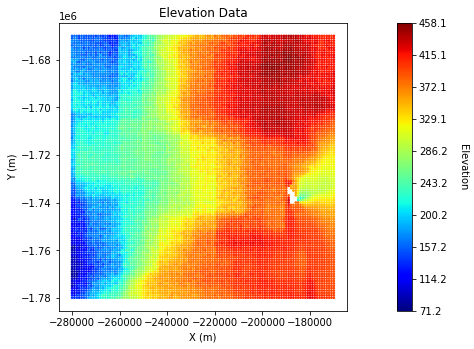

In [28]:
plot_elevations(v_df_40)

In [45]:
calculate_covariance(v_df_40)

,sill,range,elevation
sill,1.000000,0.480292,-0.656124
range,0.480292,1.000000,-0.004168
elevation,-0.656124,-0.004168,1.000000


Coefficients:  [[0.14894536]]
Variance score: 0.2306803327796524


/var/folders/yf/v2gttr450qs158f9d8wz_2vh0000gn/T/ipykernel_91538/3635247583.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(variogram_data_copy['range'],


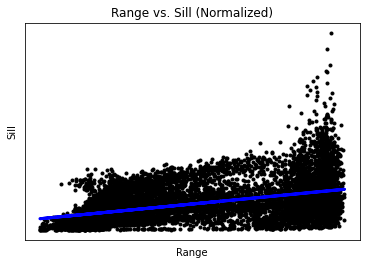

In [49]:
range_vs_sill(v_df_40)

In [29]:
pca = principal_component_analysis(v_df_40)

[0.60503965 0.33200899]
[[ 0.70624167  0.41905601 -0.57062665]
 [ 0.00154916 -0.80691583 -0.5906644 ]]


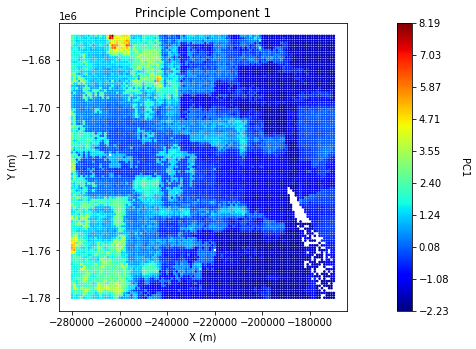

In [51]:
plot_pca1(v_df_40, pca)

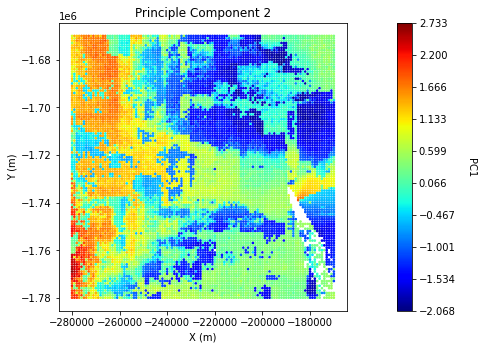

In [52]:
plot_pca2(v_df_40, pca)

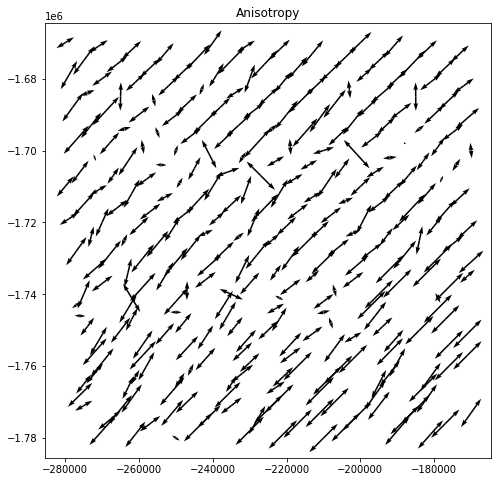

In [67]:
plot_anisotropy(v_df_40, 300)

References:
Mirko Mälicke, Egil Möller, Helge David Schneider, & Sebastian Müller. (2021, May 28).
mmaelicke/scikit-gstat: A scipy flavoured geostatistical variogram analysis toolbox (Version v0.6.0). Zenodo. http://doi.org/10.5281/zenodo.4835779\

Calculate Variance Function

In [71]:
def calculate_variance(data, square_length, x, y):
    """
    :param data: nx3 array consisting of X coordinates, Y coordinates, and bed elevation
    :param square_length: Length of the square in which variance is being calculated
    :param x: Top left x coordinate of the square
    :param y: Top left y coordinate of the square
    :return: Total variance in the square
    """

    # x <= X < x + square_length
    filtered_data = data[(data['X'] >= x) & (data['X'] < x + square_length)]

    # y - square_length < Y <= y
    filtered_data = filtered_data[(filtered_data['Y'] <= y) & (filtered_data['Y'] > y - square_length)]

    # Calculate variance
    bed_elevations = np.array(filtered_data['Bed'])
    n = len(bed_elevations)
    if n >= 2:
        variance = bed_elevations.var()
        return variance
    else:
        return 0

Iterate Square Over Entire Data Function (Variance)

In [72]:
def iterate_variance(data, square_length, stride):
    """
    :param data: nx3 array consisting of X coordinates, Y coordinates, and bed elevation
    :param square_length: Length of the squares in which variance is being calculated
    :param stride: Distance the square shifts after each iteration
    :return: pandas data frame consisting of the variance in each square, along with the X and Y coordinates of the square's top left corner
    """
    x_minimum, y_minimum, _ = data.min()
    x_maximum, y_maximum, _ = data.max()
    x, y = x_minimum, y_maximum
    square_variance = calculate_variance(data, square_length, x, y)

    variances = np.array([[x, y, square_variance]])
    x += stride

    while y - square_length >= y_minimum:
        while x + square_length <= x_maximum:
            square_variance = calculate_variance(data, square_length, x, y)
            variances = np.concatenate((variances, [[x, y, square_variance]]), axis = 0) #Slow?
            x += stride
        x = x_minimum
        y -= stride

    variances_df = pd.DataFrame(variances)
    variances_df.columns = ['X', 'Y', 'Variance']
    return variances_df

In [74]:
#variogram.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 4316520400.896099,
 'normalized_sill': 331901403.7855708,
 'normalized_nugget': 0,
 'effective_range': 65700.23136105457,
 'sill': 16856.34536224523,
 'nugget': 0,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': False,
  'maxlag': None,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [ ]:
#type(variogram.data())

In [ ]:
#plt.plot(variogram.data()[0], variogram.data()[1])

Note: you may need to restart the kernel to use updated packages.


TypeError: unsupported operand type(s) for +: 'int' and 'str'